In [70]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

df = pd.read_excel('data/DATA RUMAH.xlsx')
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


### Check Linearity

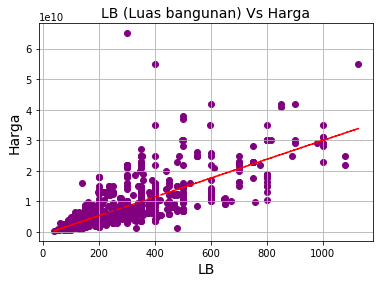

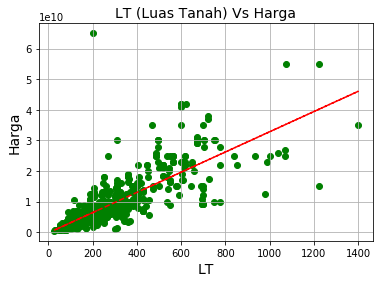

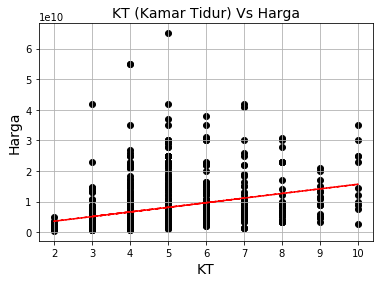

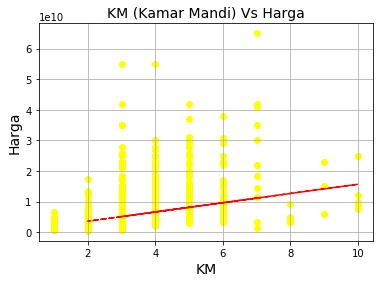

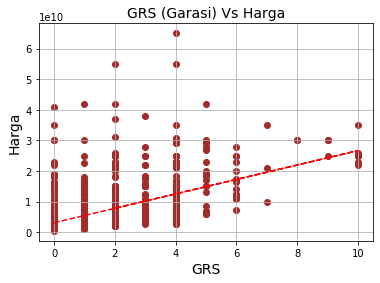

In [82]:
#luas bangunan
plt.scatter(df['LB'], df['HARGA'], color='purple')
plt.title('LB (Luas bangunan) Vs Harga', fontsize=14)
plt.xlabel('LB', fontsize=14)
plt.ylabel('Harga', fontsize=14)
plt.grid(True)

z = np.polyfit(df['LB'], df['HARGA'], 1)
p = np.poly1d(z)
plt.plot(df['LB'],p(df['LB']),"r--")

plt.show()

#luas tanah
plt.scatter(df['LT'], df['HARGA'], color='green')
plt.title('LT (Luas Tanah) Vs Harga', fontsize=14)
plt.xlabel('LT', fontsize=14)
plt.ylabel('Harga', fontsize=14)
plt.grid(True)

z = np.polyfit(df['LT'], df['HARGA'], 1)
p = np.poly1d(z)
plt.plot(df['LT'],p(df['LT']),"r--")

plt.show()

#kamar tidur
plt.scatter(df['KT'], df['HARGA'], color='black')
plt.title('KT (Kamar Tidur) Vs Harga', fontsize=14)
plt.xlabel('KT', fontsize=14)
plt.ylabel('Harga', fontsize=14)
plt.grid(True)

z = np.polyfit(df['KT'], df['HARGA'], 1)
p = np.poly1d(z)
plt.plot(df['KT'],p(df['KT']),"r--")

plt.show()

#kamar mandi
plt.scatter(df['KM'], df['HARGA'], color='yellow')
plt.title('KM (Kamar Mandi) Vs Harga', fontsize=14)
plt.xlabel('KM', fontsize=14)
plt.ylabel('Harga', fontsize=14)
plt.grid(True)

z = np.polyfit(df['KT'], df['HARGA'], 1)
p = np.poly1d(z)
plt.plot(df['KT'],p(df['KT']),"r--")

plt.show()

#garasi
plt.scatter(df['GRS'], df['HARGA'], color='brown')
plt.title('GRS (Garasi) Vs Harga', fontsize=14)
plt.xlabel('GRS', fontsize=14)
plt.ylabel('Harga', fontsize=14)
plt.grid(True)

z = np.polyfit(df['GRS'], df['HARGA'], 1)
p = np.poly1d(z)
plt.plot(df['GRS'],p(df['GRS']),"r--")

plt.show()

In [83]:
#split predictor and target

target = 'HARGA'
predictor = ['LB','LT']
y = df[target]
X = df[predictor]

print(X.head())
print(y.head())

    LB   LT
0  220  220
1  180  137
2  267  250
3   40   25
4  400  355
0    3800000000
1    4600000000
2    3000000000
3     430000000
4    9000000000
Name: HARGA, dtype: int64


In [84]:
#split data to training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(808, 2)
(808,)
(202, 2)
(202,)


In [85]:
from sklearn import linear_model

regresiModel = linear_model.LinearRegression()
regresiModel.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = regresiModel.predict(X_test)

#regresi coefisien
print(regresiModel.coef_)

#y-intercept
print(regresiModel.intercept_)

zip(predictor, regresiModel.coef_)

[13233722.43931976 22036930.64137791]
-1406213052.5961857


In [87]:
column_values = [
    'data fix',
    'data predict'
]

df = pd.DataFrame(columns = column_values) 
df['data fix'] = y_test
df['data predict'] = y_pred
df.head()

,data fix,data predict
958,3999999999,4.105332e+09
283,65000000000,6.971290e+09
356,1700000000,5.127314e+09
278,2700000000,3.378229e+09
295,3245000000,3.531447e+09


In [88]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, y_pred))

print(metrics.mean_squared_error(y_test, y_pred))

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2431419123.1718464
3.4300549283634213e+19
5856667079.8018055
